In [1]:
from MulticriteriaEnsemble import MulticriteriaEnsemble
from tools import dataset
from sklearn.metrics import make_scorer,accuracy_score,precision_score,recall_score,f1_score,hamming_loss,cohen_kappa_score,jaccard_similarity_score,matthews_corrcoef
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
import matplotlib
import pandas as pd
import numpy as np
from sklearn.externals import joblib
import os
from tools import dataset
import copy
from mauc_gini import*
matplotlib.rcParams['figure.figsize']=[1,1]
%matplotlib inline
metrics = {
    'Accuracy':[make_scorer(accuracy_score),-0.0000000001,1.000000001],
    'Precision(Macro)':[make_scorer(precision_score,average='macro'),-0.0000000001,1.000000001],
    'Recall(Macro)':[make_scorer(recall_score,average='macro'),-0.0000000001,1.000000001],
    'F1':[make_scorer(f1_score,average='macro'),-0.0000000001,1.000000001],
    'Hamming Loss':[make_scorer(hamming_loss,greater_is_better=False),1.000000001,-0.0000000001],
    'Cohen Kappa':[make_scorer(cohen_kappa_score),-0.0000000001,1.000000001],
    'MCC':[make_scorer(matthews_corrcoef),-0.0000000001,1.000000001],
}

In [2]:
waveform = dataset(path='./datasets/waveform_noise/',name='waveform_noise')
waveform.feat_class_split()
dataset=copy.deepcopy(waveform)

In [3]:
classes = dataset.y_train.append(dataset.y_test).unique()
num_classes = len(classes)
global_metric = make_scorer(MultiClassNormalizedGini,needs_proba=True,num_classes=num_classes,dt_labels=classes)

In [4]:
me = MulticriteriaEnsemble(dataset=dataset,crit_metrics=metrics,global_metric=global_metric,a=5,delta=0.14797405393367635,epsilon=0.0019575009852720771,jenks=False,voting='soft')

In [5]:
me.fit(mtable=True)

Multicriteria table formed!!!


<h3> Multicriteria Table </h3>

In [6]:
me.multicriteria_table.sort_values('Ranking')
me.multicriteria_table.to_csv(dataset.path+'results/multicriteria_table.csv')

<h3> Meta Table </h3>

In [7]:
me.meta_table
me.meta_table.to_csv(dataset.path+'results/meta_table.csv')

<h3>Multicriteria Ensemble(Utility) Normalized Gini Score on Test Set - No Jenks</h3>

In [8]:
me.score()

0.9540566821268577

<h3>Multicriteria Ensemble(Utility) Model Weights</h3> 

In [9]:
df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.weights)),orient='index')
df.columns=['Weight']
df.to_csv(dataset.path+'results/multicriteria_ensemble_model_weights_no_jenks.csv')
print df

                                      Weight
SVM_waveform_noise_FOLD3            0.045023
SVM_waveform_noise_FOLD2            0.049287
SVM_waveform_noise_FOLD1            0.045587
SVM_waveform_noise_FOLD0            0.046713
SVM_waveform_noise_FOLD4            0.043898
KNN_waveform_noise_FOLD4            0.043205
KNN_waveform_noise_FOLD2            0.044658
KNN_waveform_noise_FOLD3            0.041085
KNN_waveform_noise_FOLD0            0.042004
KNN_waveform_noise_FOLD1            0.044037
MLP_waveform_noise_FOLD4            0.043222
MLP_waveform_noise_FOLD0            0.045882
MLP_waveform_noise_FOLD1            0.045875
MLP_waveform_noise_FOLD2            0.047296
MLP_waveform_noise_FOLD3            0.045336
GaussianNB_waveform_noise_FOLD3     0.010592
GaussianNB_waveform_noise_FOLD2     0.011677
GaussianNB_waveform_noise_FOLD1     0.010752
GaussianNB_waveform_noise_FOLD0     0.011302
GaussianNB_waveform_noise_FOLD4     0.011532
LR_waveform_noise_FOLD4             0.050119
LR_wavefor

<h3>Multicriteria Ensemble(Utility) Global Utilities</h3>

In [10]:
df = pd.DataFrame.from_dict(me.utastar_model.global_utilities_post,orient='index')
df.columns=['Global Utility']
df.to_csv(dataset.path+'results/global_utilities_post.csv')

<h3>Multicriteria Ensemble(Utility) Partial Utilities</h3>

In [11]:
me.utastar_model.marginal_post

OrderedDict([('F1', [0.0, 0.0, 0.0, 0.0, 0.99456562955431593]),
             ('MCC',
              [0.0, 0.0, 0.0, 0.00039251205579913433, 0.00039251205579913433]),
             ('Cohen Kappa',
              [0.0, 0.0, 0.0, 0.00095325545695584032, 0.00095325545695584032]),
             ('Precision(Macro)',
              [0.0, 0.0, 0.0, 0.0, 0.00033653511629737505]),
             ('Hamming Loss', [0.0, 0.0, 0.0, 0.0, 0.0012884411609505439]),
             ('Recall(Macro)', [0.0, 0.0, 0.0, 0.0, 0.0011751855802152572]),
             ('Accuracy', [0.0, 0.0, 0.0, 0.0, 0.0012884410754659854])])

<h3>Multicriteria Ensemble(Utility) Criteria Weights</h3>

                    Weight
F1                0.994566
MCC               0.000393
Cohen Kappa       0.000953
Precision(Macro)  0.000337
Hamming Loss      0.001288
Recall(Macro)     0.001175
Accuracy          0.001288


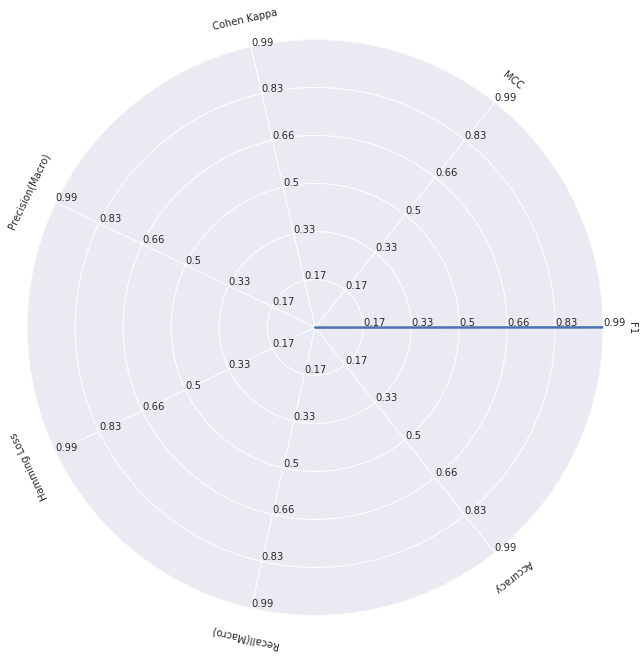

In [12]:
df = pd.DataFrame.from_dict(me.utastar_model.model_weights_post,orient='index')
df.columns=['Weight']
df.to_csv(dataset.path+'results/model_weights_post.csv')
print df
me.plot_criteria_weights()

<h3>Multicriteria Ensemble(Utility) Tau Kendall Post</h3>

In [13]:

%matplotlib inline
matplotlib.rcParams['figure.figsize']=[10,10]
me.utastar_model.tau_post

0.81442022546231629

<h3> Global Utilities Chart </h3>

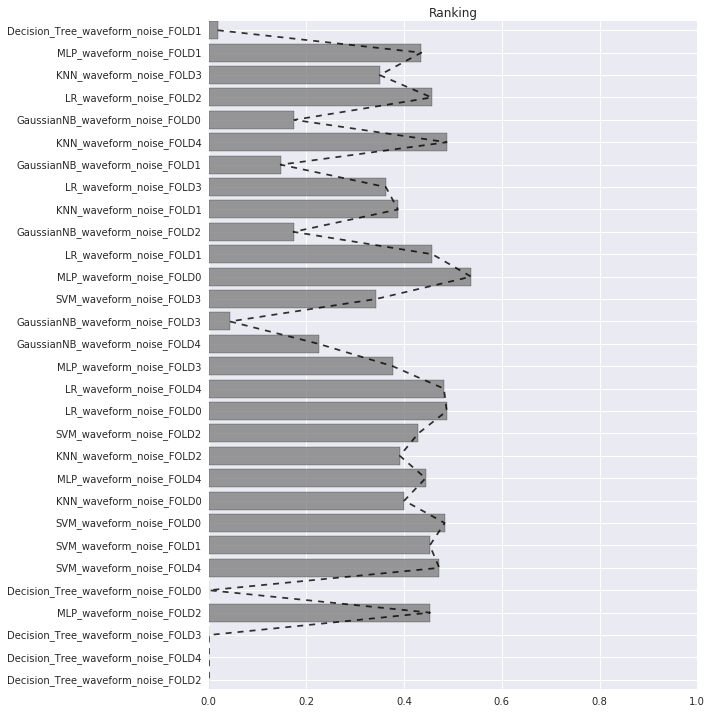

In [14]:
me.plot_global_utilities()

<h3>Predicted Global Utilities</h3>

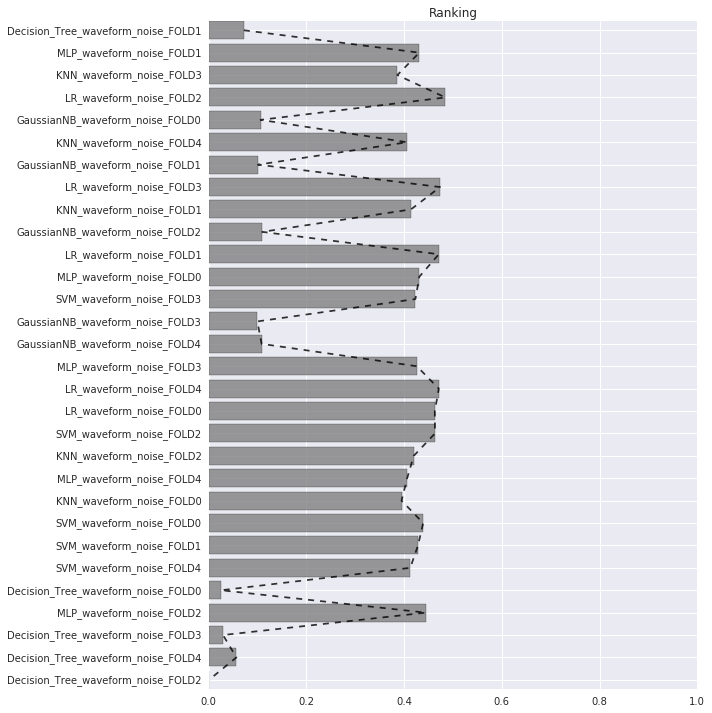

In [15]:
me.plot_global_utilities_pred()

<h3> Partial Utilities Chart </h3>

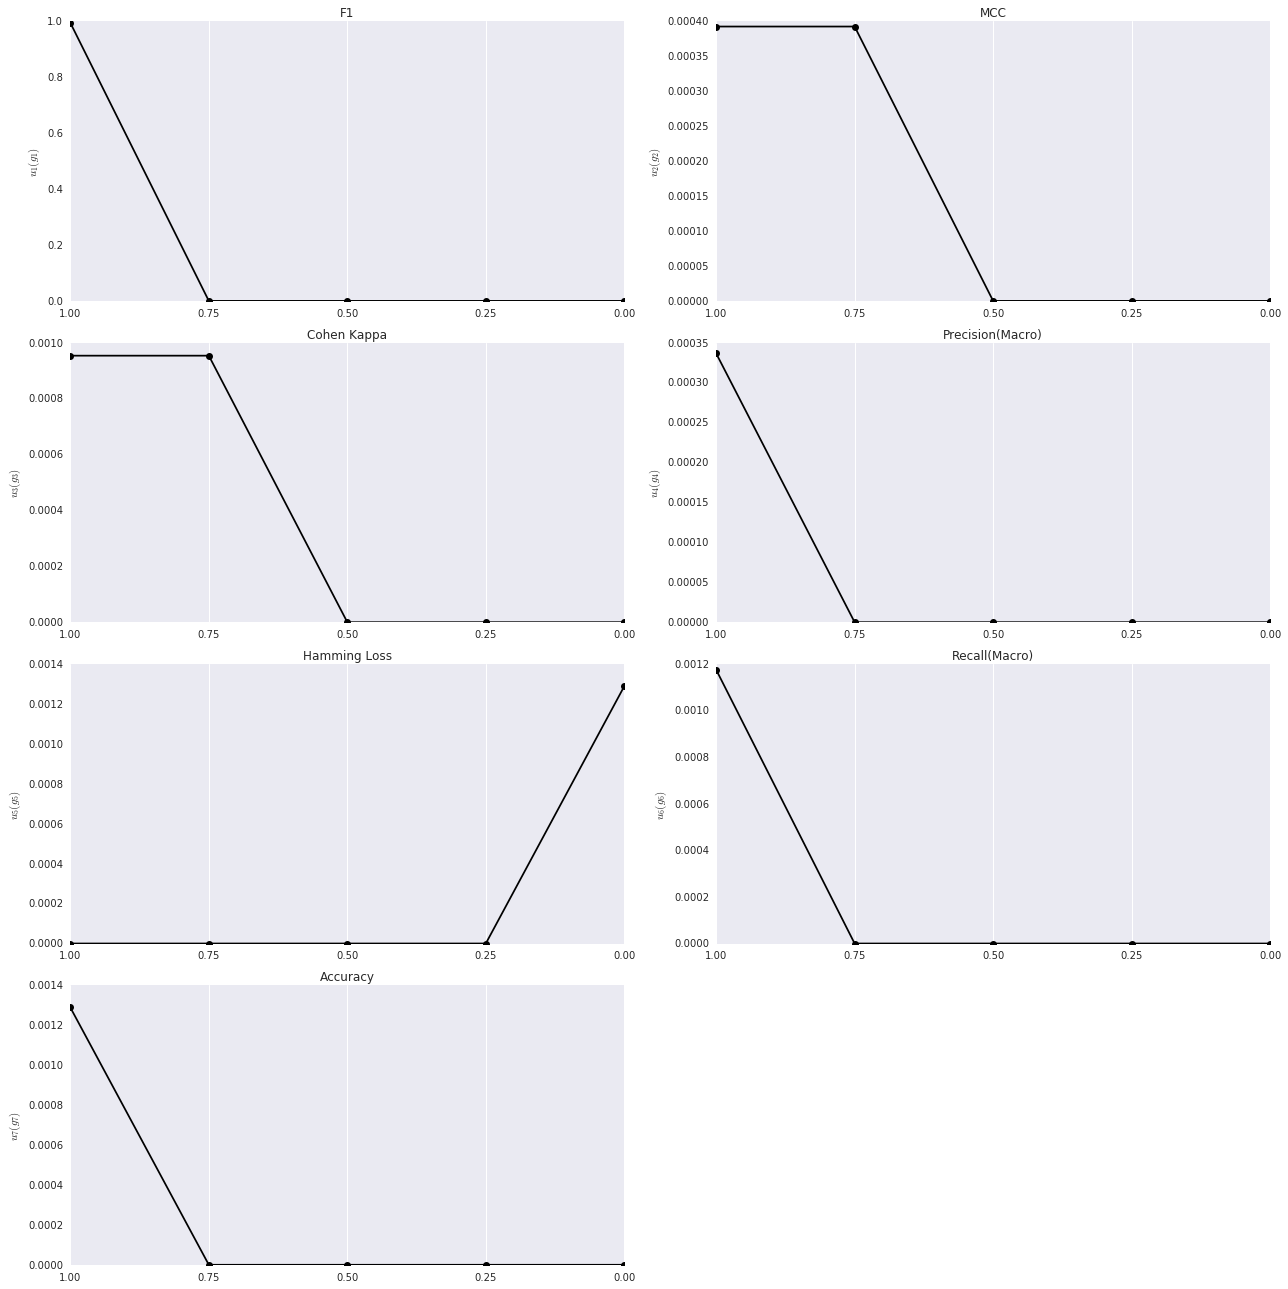

In [16]:
me.plot_partial_utilities()

<h3> Weighted Majority Voting Ensemble (Normalized Gini) Normalized Gini Score on Test Set - No Jenks </h3>

In [17]:
import jenkspy
metrics = me._get_global_metrics(me.bootstrap_models,on='test')
#natural_breaks = jenkspy.jenks_breaks(metrics, nb_class=5)
#metrics = [i if  i > natural_breaks[-2] else 0 for i in metrics]
metrics_sum = sum(metrics)
me.weights = []
for clf in metrics:
    if  clf > 0 :
        me.weights.append(clf/metrics_sum)
    
    else:
        me.weights.append(0)
me._fit_wmv()
me._get_global_metrics({'wmv':me.wmv_model},on='test')[0]

0.951713706099671

<h3> Weighted Majority Voting Ensemble (Normalized Gini) Model Weights - No Jenks </h3>

                                      Weight
SVM_waveform_noise_FOLD3            0.034377
SVM_waveform_noise_FOLD2            0.034523
SVM_waveform_noise_FOLD1            0.034434
SVM_waveform_noise_FOLD0            0.034463
SVM_waveform_noise_FOLD4            0.034405
KNN_waveform_noise_FOLD4            0.034351
KNN_waveform_noise_FOLD2            0.034446
KNN_waveform_noise_FOLD3            0.034372
KNN_waveform_noise_FOLD0            0.034394
KNN_waveform_noise_FOLD1            0.034405
MLP_waveform_noise_FOLD4            0.034305
MLP_waveform_noise_FOLD0            0.034509
MLP_waveform_noise_FOLD1            0.034475
MLP_waveform_noise_FOLD2            0.034514
MLP_waveform_noise_FOLD3            0.034524
GaussianNB_waveform_noise_FOLD3     0.033423
GaussianNB_waveform_noise_FOLD2     0.033449
GaussianNB_waveform_noise_FOLD1     0.033324
GaussianNB_waveform_noise_FOLD0     0.033375
GaussianNB_waveform_noise_FOLD4     0.033409
LR_waveform_noise_FOLD4             0.034436
LR_wavefor

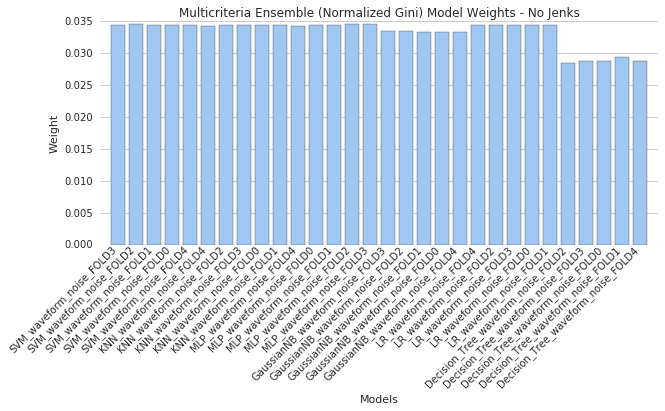

In [18]:
df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.weights)),orient='index')
df.columns=['Weight']
df.to_csv(dataset.path+'results/wmv_ensemble_normalized_gini_model_weights_no_jenks.csv')
print df
me.plot_model_weights(title='Multicriteria Ensemble (Normalized Gini) Model Weights - No Jenks')

<h3>Multicriteria Ensemble(Utility) Normalized Gini Score on Test Set - With Jenks (Default Cluster Limit = 2)</h3>

In [19]:
me.jenks=True
me.fit(mtable=False)
me.score()

0.9520132514030302

<h3>Multicriteria Ensemble(Utility) Model Weights - With Jenks (Default Cluster Limit = 2)</h3>

                                      Weight
SVM_waveform_noise_FOLD3            0.000000
SVM_waveform_noise_FOLD2            0.141627
SVM_waveform_noise_FOLD1            0.000000
SVM_waveform_noise_FOLD0            0.000000
SVM_waveform_noise_FOLD4            0.000000
KNN_waveform_noise_FOLD4            0.000000
KNN_waveform_noise_FOLD2            0.000000
KNN_waveform_noise_FOLD3            0.000000
KNN_waveform_noise_FOLD0            0.000000
KNN_waveform_noise_FOLD1            0.000000
MLP_waveform_noise_FOLD4            0.000000
MLP_waveform_noise_FOLD0            0.000000
MLP_waveform_noise_FOLD1            0.000000
MLP_waveform_noise_FOLD2            0.135907
MLP_waveform_noise_FOLD3            0.000000
GaussianNB_waveform_noise_FOLD3     0.000000
GaussianNB_waveform_noise_FOLD2     0.000000
GaussianNB_waveform_noise_FOLD1     0.000000
GaussianNB_waveform_noise_FOLD0     0.000000
GaussianNB_waveform_noise_FOLD4     0.000000
LR_waveform_noise_FOLD4             0.144019
LR_wavefor

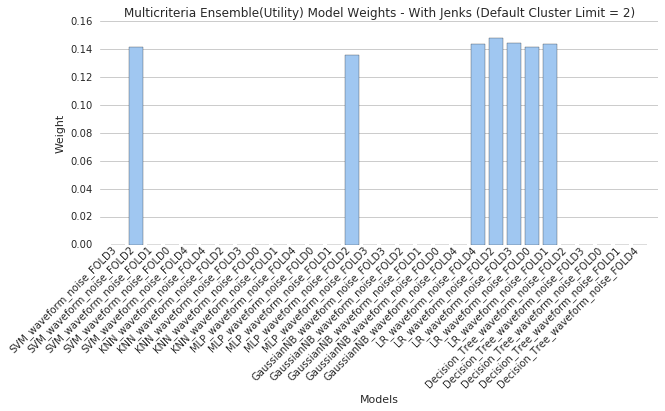

In [20]:
df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.weights)),orient='index')
df.columns=['Weight']
df.to_csv(dataset.path+'results/multicriteria_ensemble_model_weights_with_jenks_l2.csv')
print df
me.plot_model_weights(title='Multicriteria Ensemble(Utility) Model Weights - With Jenks (Default Cluster Limit = 2)')

<h3>Multicriteria Ensemble(Utility) Normalized Gini Score on Test Set,Model weights and Number of models in the ensemble - With Jenks</h3>

Cluster Limit: 0
Multicriteria Ensemble Normalized Gini Score: 0.954057
Number of models in the ensemble: 30

                                      Weight
SVM_waveform_noise_FOLD3            0.045023
SVM_waveform_noise_FOLD2            0.049287
SVM_waveform_noise_FOLD1            0.045587
SVM_waveform_noise_FOLD0            0.046713
SVM_waveform_noise_FOLD4            0.043898
KNN_waveform_noise_FOLD4            0.043205
KNN_waveform_noise_FOLD2            0.044658
KNN_waveform_noise_FOLD3            0.041085
KNN_waveform_noise_FOLD0            0.042004
KNN_waveform_noise_FOLD1            0.044037
MLP_waveform_noise_FOLD4            0.043222
MLP_waveform_noise_FOLD0            0.045882
MLP_waveform_noise_FOLD1            0.045875
MLP_waveform_noise_FOLD2            0.047296
MLP_waveform_noise_FOLD3            0.045336
GaussianNB_waveform_noise_FOLD3     0.010592
GaussianNB_waveform_noise_FOLD2     0.011677
GaussianNB_waveform_noise_FOLD1     0.010752
GaussianNB_waveform_noise_FOLD0    

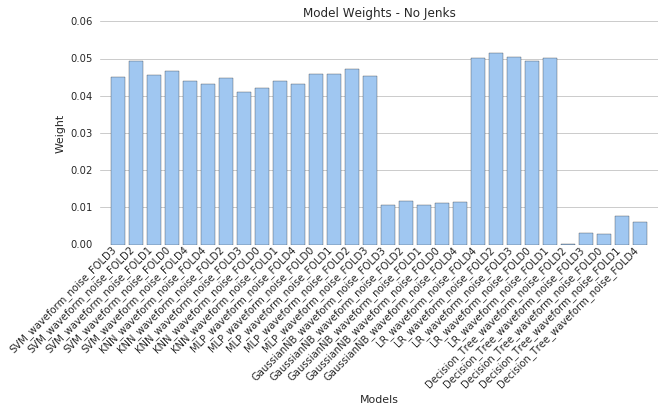

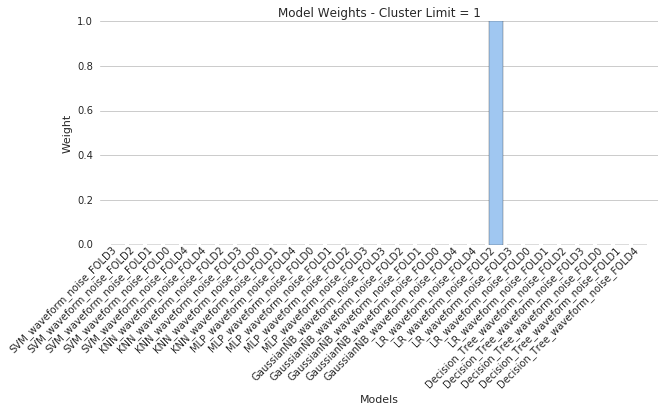

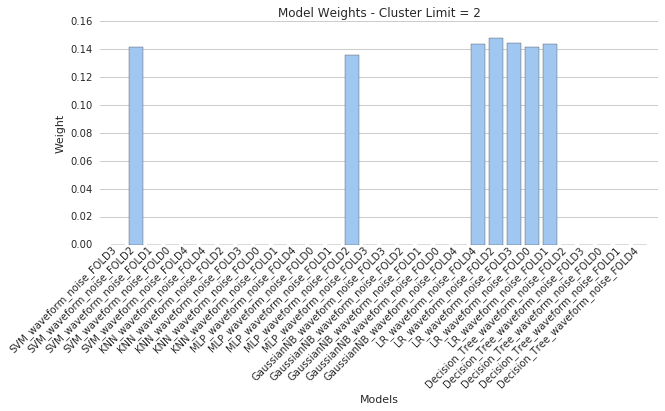

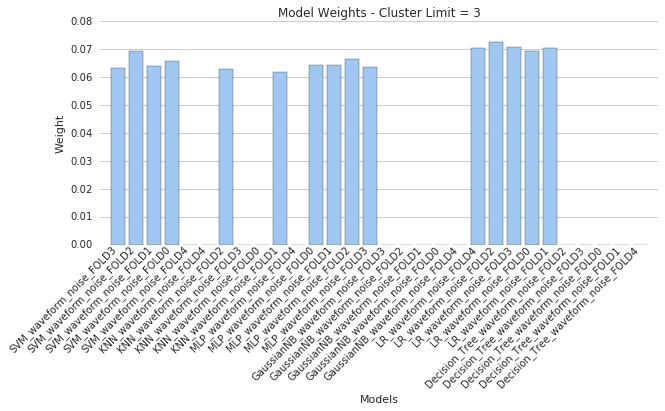

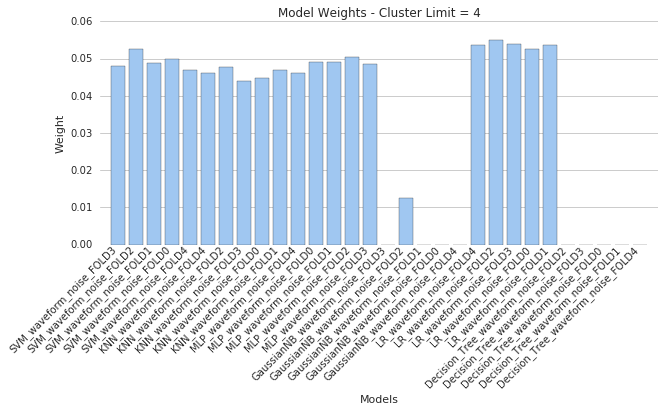

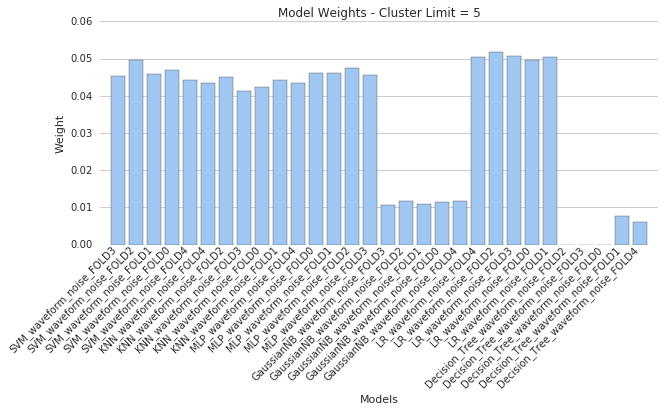

In [21]:
for i in range(0,6,1):
    me.jenks_limit = i
    me.weights = []
    me._get_clfs_weights()
    me._fit_wmv()
    model_counter = 0;
    for j in me.weights:
        if j>0:
            model_counter+=1
    print 'Cluster Limit: %i'%i
    print 'Multicriteria Ensemble Normalized Gini Score: %f'%me.score()
    print 'Number of models in the ensemble: %i\n'%model_counter
    df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.weights)),orient='index')
    df.columns=['Weight']
    df.to_csv(dataset.path+'results/multicriteria_ensemble_model_weights_with_jenks_l%i.csv'%i)
    print df
    if i == 0:
        title='Model Weights - No Jenks'
    else:
        title=str('Model Weights - Cluster Limit = %i'%i)
    me.plot_model_weights(title=title)

<h3> Jenks - Natural Breaks - Based on Utility</h3>

In [22]:
clusters = []
for i in range(0,len(me.natural_breaks)):
    if i ==0:
        clusters.append(str('[%f,%f)'%(0,me.natural_breaks[i])))
    else:
        clusters.append(str('[%f,%f)'%(me.natural_breaks[i-1],me.natural_breaks[i])))
df = pd.DataFrame(clusters,columns=['Cluster'])
df.to_csv(dataset.path+'results/multicriteria_ensemble_jenks_natural_breaks.csv')
df

,Cluster
0,"[0.000000,0.000724)"
1,"[0.000724,0.056767)"
2,"[0.056767,0.109744)"
3,"[0.109744,0.413876)"
4,"[0.413876,0.444504)"
5,"[0.444504,0.484437)"


<h3>Weighted Majority Voting Ensemble(Normalized Gini) Normalized Gini Score on Test Set - With Jenks</h3>

In [23]:
metrics = me._get_global_metrics(me.bootstrap_models,on='test')
natural_breaks = jenkspy.jenks_breaks(metrics, nb_class=5)
metrics = [i if  i >= natural_breaks[-2] else 0 for i in metrics]
metrics_sum = sum(metrics)
me.weights = []
for clf in metrics:
    if  clf > 0 :
        me.weights.append(clf/metrics_sum)
    
    else:
        me.weights.append(0)
me._fit_wmv()
me._get_global_metrics({'wmv':me.wmv_model},on='test')[0]

0.9534802601164156

<h3>Weighted Majority Voting Ensemble(Normalized Gini) Model Weights</h3>

                                      Weight
SVM_waveform_noise_FOLD3            0.000000
SVM_waveform_noise_FOLD2            0.071546
SVM_waveform_noise_FOLD1            0.071362
SVM_waveform_noise_FOLD0            0.071424
SVM_waveform_noise_FOLD4            0.071304
KNN_waveform_noise_FOLD4            0.000000
KNN_waveform_noise_FOLD2            0.071388
KNN_waveform_noise_FOLD3            0.000000
KNN_waveform_noise_FOLD0            0.000000
KNN_waveform_noise_FOLD1            0.000000
MLP_waveform_noise_FOLD4            0.000000
MLP_waveform_noise_FOLD0            0.071517
MLP_waveform_noise_FOLD1            0.071448
MLP_waveform_noise_FOLD2            0.071528
MLP_waveform_noise_FOLD3            0.071549
GaussianNB_waveform_noise_FOLD3     0.000000
GaussianNB_waveform_noise_FOLD2     0.000000
GaussianNB_waveform_noise_FOLD1     0.000000
GaussianNB_waveform_noise_FOLD0     0.000000
GaussianNB_waveform_noise_FOLD4     0.000000
LR_waveform_noise_FOLD4             0.071367
LR_wavefor

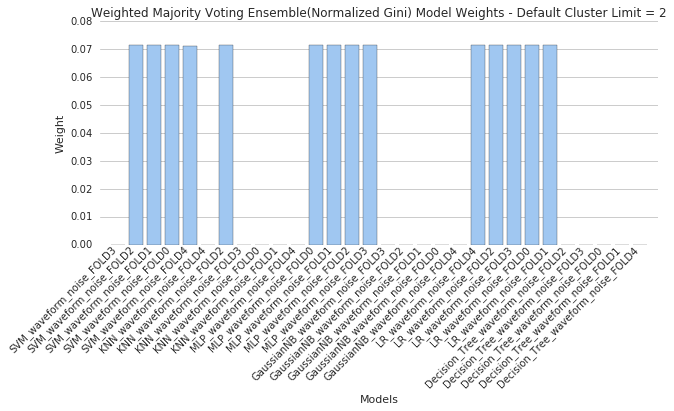

In [24]:
df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.weights)),orient='index')
df.columns=['Weight']
df.to_csv(dataset.path+'results/wmv_ensemble_normalized_gini_model_weights_with_jenks_l.csv')
print df
me.plot_model_weights(title='Weighted Majority Voting Ensemble(Normalized Gini) Model Weights - Default Cluster Limit = 2')

<h3>Weighted Majority Voting Ensemble(Normalized Gini) Normalized Gini Score on Test Set,Model weights and Number of models in the ensemble - With Jenks</h3>

Cluster Limit: 0
Weighted Majority Voting Ensemble(Normalized Gini) Normalized Gini Score: 0.951714
Number of models in the ensemble: 30

                                      Weight
SVM_waveform_noise_FOLD3            0.034377
SVM_waveform_noise_FOLD2            0.034523
SVM_waveform_noise_FOLD1            0.034434
SVM_waveform_noise_FOLD0            0.034463
SVM_waveform_noise_FOLD4            0.034405
KNN_waveform_noise_FOLD4            0.034351
KNN_waveform_noise_FOLD2            0.034446
KNN_waveform_noise_FOLD3            0.034372
KNN_waveform_noise_FOLD0            0.034394
KNN_waveform_noise_FOLD1            0.034405
MLP_waveform_noise_FOLD4            0.034305
MLP_waveform_noise_FOLD0            0.034509
MLP_waveform_noise_FOLD1            0.034475
MLP_waveform_noise_FOLD2            0.034514
MLP_waveform_noise_FOLD3            0.034524
GaussianNB_waveform_noise_FOLD3     0.033423
GaussianNB_waveform_noise_FOLD2     0.033449
GaussianNB_waveform_noise_FOLD1     0.033324
Gaussia

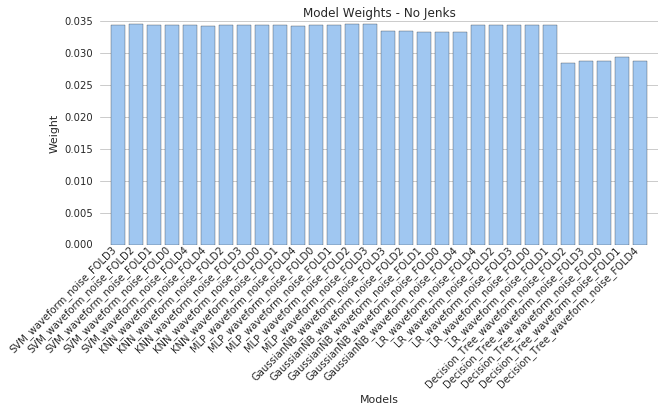

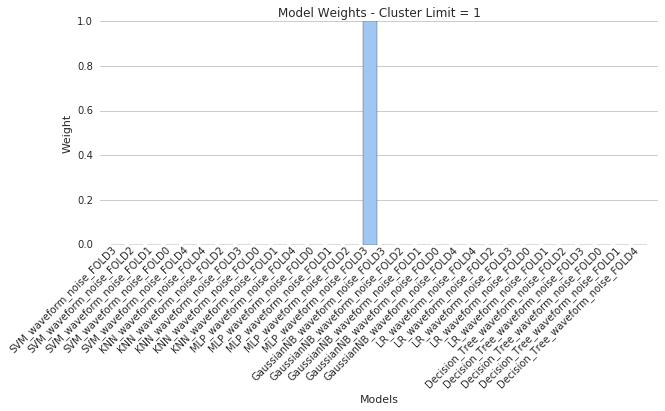

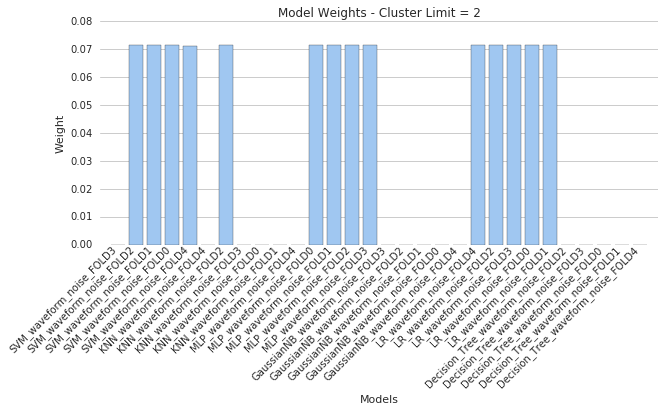

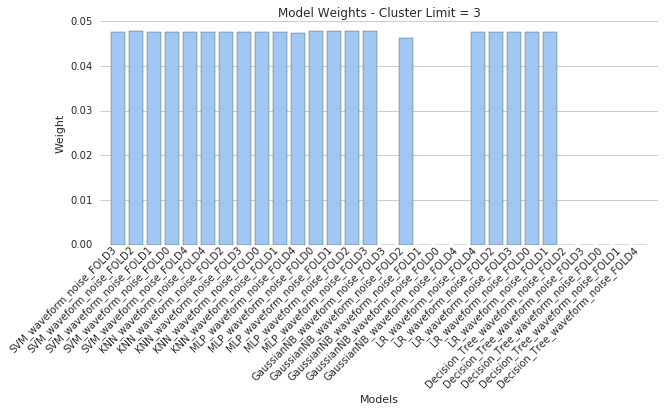

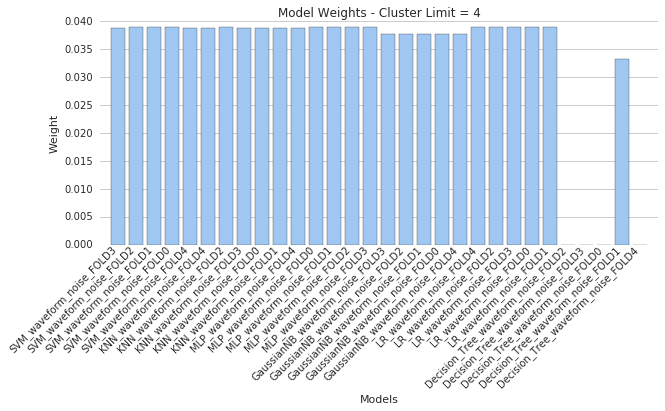

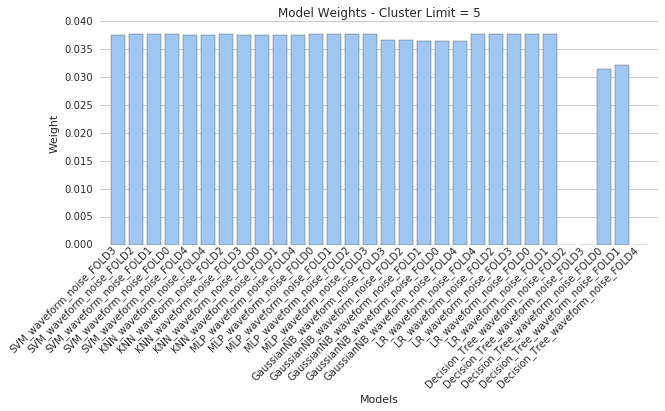

In [25]:
metrics = me._get_global_metrics(me.bootstrap_models,on='test')
m = metrics
natural_breaks = jenkspy.jenks_breaks(metrics, nb_class=5)
for i in range(0,6,1):
    metrics = m
    metrics = [j if  j >= natural_breaks[-i] else 0 for j in metrics]
    metrics_sum = sum(metrics)
    me.weights = []
    for clf in metrics:
        if  clf > 0 :
            me.weights.append(clf/metrics_sum)
        else:
            me.weights.append(0)
    me._fit_wmv()
    model_counter = 0;
    for k in me.weights:
        if k>0:
            model_counter+=1
    print 'Cluster Limit: %i'%i
    print 'Weighted Majority Voting Ensemble(Normalized Gini) Normalized Gini Score: %f'%me.score()
    print 'Number of models in the ensemble: %i\n'%model_counter
    df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.weights)),orient='index')
    df.columns=['Weight']
    df.to_csv(dataset.path+'results/wmv_ensemble_normalized_gini_model_weights_with_jenks_l%i.csv'%i)
    print df
    if i == 0:
        title='Model Weights - No Jenks'
    else:
        title=str('Model Weights - Cluster Limit = %i'%i)
    me.plot_model_weights(title=title)

<h3> Jenks - Natural Breaks - Based on Normalized Gini</h3>

In [26]:
clusters = []
for i in range(0,len(me.natural_breaks)):
    if i ==0:
        clusters.append(str('[%f,%f)'%(0,me.natural_breaks[i])))
    else:
        clusters.append(str('[%f,%f)'%(me.natural_breaks[i-1],me.natural_breaks[i])))
df = pd.DataFrame(clusters,columns=['Cluster'])
df.to_csv(dataset.path+'results/wmv_ensemble_normalized_gini_jenks_natural_breaks.csv')
df

,Cluster
0,"[0.000000,0.000724)"
1,"[0.000724,0.056767)"
2,"[0.056767,0.109744)"
3,"[0.109744,0.413876)"
4,"[0.413876,0.444504)"
5,"[0.444504,0.484437)"


<h3> Weighted Majority Voting Ensemble (Equal Weights, 1/(number_of_models)) </h3>

In [27]:
me.weights = []
for clf in me.bootstrap_models:
    me.weights.append(float(1)/float(len(me.bootstrap_models)))
me.weights
me._fit_wmv()
me._get_global_metrics({'wmv':me.wmv_model},on='test')[0]

0.9513132854093951

<h3>Base Models Normalized Gini Score</h3>

In [28]:
df = pd.DataFrame.from_dict(dict(zip(me.models.keys(),me._get_global_metrics(me.models,on='test'))),orient='index')
df.columns = ['Normalized Gini']
df.to_csv(dataset.path+'results/base_learners_normalized_gini_score.csv')

<h3> Base K-Fold Models Normalized Ginis Score</h3>

In [29]:
df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me._get_global_metrics(me.bootstrap_models,on='test'))),orient='index')
df.columns = ['Normalized Gini']
df.to_csv(dataset.path+'results/base_k_fold_learners_normalized_gini_score.csv')

In [30]:
df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.global_utilities)),orient='index')
df.columns=['Global Utility']
df.to_csv(dataset.path+'results/multicriteria_ensemble_predicted_global_utilities.csv')
print df

                                    Global Utility
SVM_waveform_noise_FOLD3                  0.423139
SVM_waveform_noise_FOLD2                  0.463210
SVM_waveform_noise_FOLD1                  0.428441
SVM_waveform_noise_FOLD0                  0.439021
SVM_waveform_noise_FOLD4                  0.412567
KNN_waveform_noise_FOLD4                  0.406054
KNN_waveform_noise_FOLD2                  0.419706
KNN_waveform_noise_FOLD3                  0.386126
KNN_waveform_noise_FOLD0                  0.394763
KNN_waveform_noise_FOLD1                  0.413876
MLP_waveform_noise_FOLD4                  0.406210
MLP_waveform_noise_FOLD0                  0.431212
MLP_waveform_noise_FOLD1                  0.431142
MLP_waveform_noise_FOLD2                  0.444504
MLP_waveform_noise_FOLD3                  0.426081
GaussianNB_waveform_noise_FOLD3           0.099549
GaussianNB_waveform_noise_FOLD2           0.109744
GaussianNB_waveform_noise_FOLD1           0.101054
GaussianNB_waveform_noise_FOLD0

In [31]:
me.multicriteria_table.sort_values('Ranking').to_csv('./statlog_me_table.csv')

In [32]:
from mlxtend.classifier import EnsembleVoteClassifier
clf = copy.copy(me.bootstrap_models['SVM_statlog_satimage_FOLD3'])
clf.fit(statlog_satimage.X_train.ix[me.kfold_indices[3]],statlog_satimage.y_train.ix[me.kfold_indices[3]])
tk = EnsembleVoteClassifier(clfs=[copy.copy(clf)], voting='soft', weights=[1],refit=True)
tk.fit(statlog_satimage.X_train.ix[me.kfold_indices[3]],statlog_satimage.y_train.ix[me.kfold_indices[3]])
np.array_equal(clf.predict(statlog_satimage.X_test),tk.predict(statlog_satimage.X_test))

KeyError: 'SVM_statlog_satimage_FOLD3'

In [33]:
me.utastar_model.tau_post

0.81442022546231629